## GEREKLİ KÜTÜPHANELER VE SINIFLARIN İÇERİ AKTARILMASI

In [47]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## VERİ SETİNİ İÇERİ ALMA VE TANIMA

Veri setini içeri aldıktan sonra hem kontrol amaçlı hem de veri setine göz atmak için `head()` metotunu kullanırız. Veri setindeki özellikleri detaylıca incelemeden önce veri setimizi tanıyalım ve amacımızı belirleyelim. Veri setimiz *denizkulağı* olarak bilinen canlının **Cinsiyet**, **Uzunluk**, **Çap**, **Boy**, **Toplam Ağırlık**, **Kabuksuz Ağırlık**, **İç Organlar Ağırlığı**, **Kabuk Ağırlığı**, **Halka Sayısı** özelliklerini içerir. Amacımız diğer 8 özelliğe bakarak **Halka Sayısı** özelliğini tahmin etmektir.

In [48]:
data = pd.read_csv('abalone - Kopya.csv',
                   names=['Sex', 'Length', 'Diameter', 'Height',
                         'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'])
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


`info()` metotu kullanılarak özelliklerimizin veri tipini, ne kadar kayıta sahip olduğumuzu ve bellek kullanımını görüntüleriz.

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


`isna()` ve `sum()` metotları kullanılarak her özellikte ne kadar `NULL` değer olduğu sayısı elde edilir.

In [50]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

`describe()` metotu kullanılarak kategorik bir veri olan **Cinsiyet** hariç tüm özelliklere ait *sayım*, *aritmetik ortalama*, *minimum*, *maksimum* değerler gibi istatistiksel veriler elde edilir.

In [51]:
data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## VERİ SETİNDE BAĞIMLI VE BAĞIMSIZ DEĞİŞKENLERİN BÖLÜNMESİ

Bağımlı ve bağımsız değişkenler bölünür. Tahmin edeceğimiz özellik **Rings** özelliğidir ve bu özelliğimiz fiziksel özellikler olan diğer özelliklere bağımlıdır.

In [52]:
X = data.drop(columns=['Rings'])
y = data['Rings']

## KATEGORİK DEĞİŞKENİN DÖNÜŞTÜRÜLMESİ

Kategorik veriler modellerimiz tarafından işlenemez bu yüzden bunları modellerimiz için kullanılabilir hale getirmeliyiz. `LabelEncoder()` sınıfından `fit_transform()` metotunu kullanarak tek bir sütun olarak *encoding* işlemini gerçekleştiririz.

In [53]:
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])

## EĞİTİM VE TEST VERİ SETLERİNİN OLUŞTURULMASI VE MODELİN EĞİTİLMESİ

Lineer regresyon modelinde hiperparametre bulunmadığı için ve basit, hızlı olduğundan veri setini `train_test_split()` metotunu kullanarak %80 eğitim - %20 test olarak ayırırız.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Burada değerlerin standardizasyonu gerçekleştirilmiştir.
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

## MODELİN DEĞERLENDİRİLMESİ

In [55]:
mse = mean_squared_error(y_test, y_pred)
print(f'Lineer regresyon için ortalama kare hata sonucu: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'Lineer regresyon için r-kare sonucu: {r2}')

Lineer regresyon için ortalama kare hata sonucu: 5.0625379540952355
Lineer regresyon için r-kare sonucu: 0.5323381317508206


## MODELİN GÖRSELLEŞTİRİLMESİ

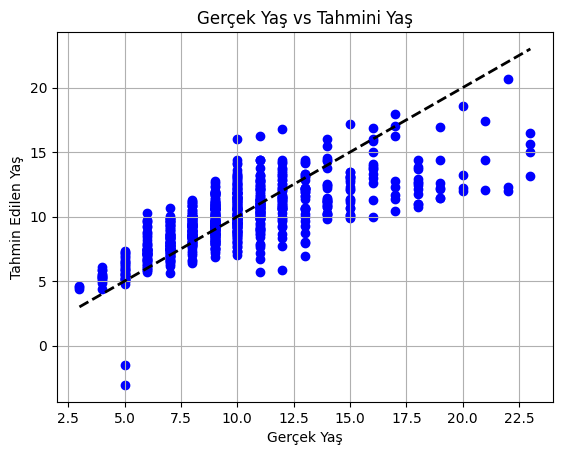

In [56]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Gerçek Yaş')
plt.ylabel('Tahmin Edilen Yaş')
plt.title('Gerçek Yaş vs Tahmini Yaş')
plt.grid(True)
plt.show()